<a href="https://colab.research.google.com/github/Kidinnu/classes_programming/blob/master/contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо написать программу - помощник архитектора в рисовании очертания города. Город задается расположением зданий. Город рассматривается как двумерный и все здания в нем - прямоугольники, имеющие одинаковое основание (город построен на равнине). Здания задаются тройкой чисел ($L_i$,$R_i$,$H_i$) где $L_i$ и $R_i$ есть координаты левой и правой стен здания $i$, а $H_i$ - высота этого здания. 

[Источник](http://algolist.manual.ru/olimp/geo_prb.php)


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# x левой стены, x правой стены, высота
buildings = np.array([[0,4,5],
                      [2,6,9],
                      [2,6,2],
                      [3,9,3],
                      [11,14,4],
                      [14,17,2]])

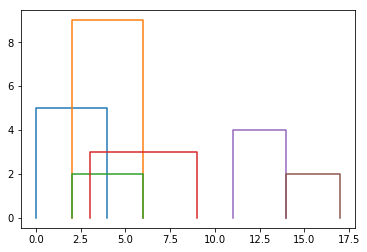

In [0]:
# Вспомогательная функция для рисования здания
def get_building_polygon(b):
  return np.array([[b[0],0],[b[0],b[2]],[b[1],b[2]],[b[1],0]])

# Начальное состояние
for building in buildings:
  xy = get_building_polygon(building)
  plt.plot(xy[:,0],xy[:,1])

In [5]:
def get_highest_building_for_pos(pos, buildings):
  # Функция Возвращает самое высокое здание в позиции x
  # не учитывая здания, у которых с x совпадает правая граница (это здание уже пройдено)
  xbuildings = filter(lambda b: b[0] <= pos[0] < b[1] and pos[1]!=b[2], buildings)
  max_xbuilding = max(xbuildings, key= lambda b: b[2], default=None) 
  return max_xbuilding

# например
print(get_highest_building_for_pos([6,0],buildings))

[3 9 3]


In [6]:
def get_right_side_of_the_roof(pos, buildings):
  # Функция возвращает правую границу крыши на которой находится точка pos
  # или None, если точка находится на поверхности земли 
  if pos[1] != 0:
    building = list(filter(lambda b: b[0] <= pos[0] <= b[1] and b[2] == pos[1], buildings)) 
    return building[0][1]
  else:
    return None

# Например
get_right_side_of_the_roof([6,9],buildings)

6

In [0]:
# Начальное положение (кранее левое)
pos  = [buildings[0,0], 0]
# Путь (записываем туда первую точку)
path = [pos.copy()]

# Номер этапа
# 0,2,4,6,... -- подъем или спуск
# 1,3,5,7,... -- движение вправо
stage = 0

# Движемся пока не достигнем земли (pos[1]=0) 
# на правой стороне последнего здания (pos[0]==buildings[-1,1])
while pos[0]!=buildings[-1,1] or pos[1]!=0:
  # Если находимся на правом краю крыши последнего здания, то спускаемся вниз 
  if pos[0]==buildings[-1,1] and pos[1]!=0:
    pos[1] = 0
    path.append(pos.copy())
  
  # Иначе продолжаем долгий путь
  # Определяем этап (движение по вертикали или горизонтали)
  if stage % 2 == 0 : # Движение по вертикали    
    # Самое высокое здание в текущей позиции - pos[0],
    # при этом здание с высотой, равной текущей не учитывается
    bmax = get_highest_building_for_pos(pos, buildings)

    if (not (bmax is None)) and bmax[2] > pos[1]:
      # Если такое здание нашлось (результат не None)
      # и если это здание выше текущей позиции, то поднимаемся на его крышу
      pos[1] = bmax[2]
      path.append(pos.copy())
      
    elif (not (bmax is None)) and bmax[2] < pos[1]:
      # Если это здание ниже теущей позиции, спускаемся
      pos[1] = bmax[2]
      path.append(pos.copy())
    else :
      # Если здания нет, то
      # нужно спускаться вниз до 0
      pos[1] = 0
      path.append(pos.copy())
  else: 
      # Движение вправо      
      # До самого ближайшего самого высокого здания (больше текущего уровня)
      # Определяем правую кооординату крыши, на которой мы находимся
      # Здания, выше текущего уровня крыши, будем искать только среди тех,
      # которые имею левую границу больше текущей позиции x (pos[0])
      # но меньше правой границы крыши, на которой мы находимся 
      x_right_roof = get_right_side_of_the_roof(pos, buildings)
      # x_right_roof может быть пустым, если мы не на крыше, а на земле 
      # т.е. находимся в разрыве между заниями      

      if not (x_right_roof is None):
        # Список всех зданий внутри интервала "текущей крыши"
        candidates = list(filter(lambda b: pos[0]<=b[0]<=x_right_roof and b[2]>pos[1], buildings)) 
      else:
        # Список всех зданий правее, если мы не на крыше
        candidates = list(filter(lambda b: pos[0]<=b[0] and b[2]>pos[1], buildings)) 
      
      # Выбираем ближайшее правое здание (если есть из чего выбирать)     
      if len(candidates) > 0:
        next_right_building = sorted(candidates, key = lambda x: x[0]) 
        pos[0] = next_right_building[0][0]
        path.append(pos.copy())
      else:
        # Если выбирать не из чего, двигаемся до правой границы крыши,
        # на которой находимся
        pos[0] = x_right_roof
        path.append(pos.copy())
 
  stage = stage + 1
  
  # Аварийное завершение цикла (если за предельное числов итераций алгоритм 
  # не завершилося: это признак ошибки в ИД или в алгоритме)
  if stage > len(buildings)*3:
    print('Достигнут предел итераций. Выход. Что-то не так...')
    break 

path = np.array(path)

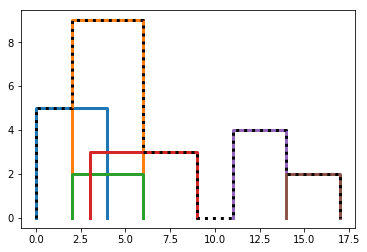

In [0]:
for building in buildings:
  xy = get_building_polygon(building)
  plt.plot(xy[:,0],xy[:,1],lw=3)
  
plt.plot(path[:,0],path[:,1],'k:',lw=3)